In [2]:
!pip install numpy pandas matplotlib seaborn scikit-learn xgboost lightgbm catboost shap


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#importing all the required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [4]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [5]:
train_df = train_df.iloc[:,2:]
test_df = test_df.iloc[:,2:]

From EDA, we know that our datasets have missing values, instead of imputing them, lets try using the some models which natively support training on data which has missing values 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model & pipeline imports
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.compose import ColumnTransformer

In [7]:
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (103904, 23)
Test shape: (25976, 23)


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_df["satisfaction"] = le.fit_transform(train_df["satisfaction"])
test_df["satisfaction"] = le.transform(test_df["satisfaction"])

print("Unique values in train_df['satisfaction']:", train_df["satisfaction"].unique())


Unique values in train_df['satisfaction']: [0 1]


In [9]:

nominal_cols = ["Gender", "Customer Type", "Type of Travel", "Class"]
numeric_cols = [col for col in train_df.columns if col not in nominal_cols + ["satisfaction"]]
# For numeric columns, we leave missing values as they are so that models like XGBoost can handle them.
# (Optionally, ensure they are numeric in case they're read as objects.)
for col in numeric_cols:
    train_df[col] = pd.to_numeric(train_df[col], errors='coerce')
    test_df[col] = pd.to_numeric(test_df[col], errors='coerce')

preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_cols),
        ("cat", OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), nominal_cols)

    ]
)

# =============================
# Modeling: XGBoost and LightGBM (Both Can Handle Missing Values)
# =============================
# We create pipelines for each model.
pipelines = {
    "XGBoost": Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", XGBClassifier( eval_metric='mlogloss', random_state=42))
    ]),
    "LightGBM": Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", LGBMClassifier(random_state=42))
    ])
}

# Separate features and target for training and testing.
X_train = train_df.drop("satisfaction", axis=1)
y_train = train_df["satisfaction"]

X_test = test_df.drop("satisfaction", axis=1)
y_test = test_df["satisfaction"]

# Evaluate pipelines
for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(f"=== Model: {name} ===")
    print(classification_report(y_test, y_pred, target_names=[str(cls) for cls in le.classes_], digits = 5
))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

=== Model: XGBoost ===
                         precision    recall  f1-score   support

neutral or dissatisfied    0.95747   0.97790   0.96758     14573
              satisfied    0.97097   0.94449   0.95755     11403

               accuracy                        0.96324     25976
              macro avg    0.96422   0.96120   0.96256     25976
           weighted avg    0.96340   0.96324   0.96318     25976

Confusion Matrix:
[[14251   322]
 [  633 10770]]


[LightGBM] [Info] Number of positive: 45025, number of negative: 58879
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003569 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 103904, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433333 -> initscore=-0.268267
[LightGBM] [Info] Start train

c:\Users\jaind\Desktop\ML Proj\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [10]:
train_df = train_df.dropna(subset=['Arrival Delay in Minutes'])
test_df = test_df.dropna(subset=['Arrival Delay in Minutes'])

rmed the the rows with missing values



running baseline model

In [11]:
# redifining the train test splits this time without the missing values
X_train = train_df.drop("satisfaction", axis=1)
y_train = train_df["satisfaction"]

X_test = test_df.drop("satisfaction", axis=1)
y_test = test_df["satisfaction"]


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [13]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "MLPClassifier": MLPClassifier(max_iter=500, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

scale_sensitive = ["Logistic Regression", "SVM", "K-Nearest Neighbors", "Gaussian Naive Bayes", "MLPClassifier"]

# Define groups for SHAP analysis:
best_models = ["Random Forest", "Extra Trees", "XGBoost"]
worst_models = ["Logistic Regression", "SVM", "Gaussian Naive Bayes"]

# Save pipelines for models in these groups:
saved_pipelines = {}

print("\n--- Baseline Model Performance ---\n")
for name, model in models.items():
    if name in scale_sensitive:
        pipe = Pipeline(steps=[
            ("preprocessor", preprocessor),
            ("scaler", StandardScaler()),
            ("classifier", model)
        ])
    else:
        pipe = Pipeline(steps=[
            ("preprocessor", preprocessor),
            ("classifier", model)
        ])
    
    # Fit the model.
    pipe.fit(X_train, y_train)
    # Predict on test set.
    y_pred = pipe.predict(X_test)
    
    print(f"=== Model: {name} ===")
    print(classification_report(y_test, y_pred, target_names=[str(cls) for cls in le.classes_], digits=5))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")
    
    # Save pipelines for models that we want to run SHAP on.
    if name in best_models or name in worst_models:
        saved_pipelines[name] = pipe

# Optional: Print which pipelines were saved.
print("Saved pipelines for SHAP analysis:", list(saved_pipelines.keys()))



--- Baseline Model Performance ---

=== Model: Logistic Regression ===
                         precision    recall  f1-score   support

neutral or dissatisfied    0.87355   0.90205   0.88757     14528
              satisfied    0.86934   0.83308   0.85083     11365

               accuracy                        0.87178     25893
              macro avg    0.87145   0.86757   0.86920     25893
           weighted avg    0.87170   0.87178   0.87144     25893

Confusion Matrix:
[[13105  1423]
 [ 1897  9468]]


=== Model: Decision Tree ===
                         precision    recall  f1-score   support

neutral or dissatisfied    0.95310   0.94982   0.95146     14528
              satisfied    0.93614   0.94026   0.93819     11365

               accuracy                        0.94562     25893
              macro avg    0.94462   0.94504   0.94482     25893
           weighted avg    0.94566   0.94562   0.94564     25893

Confusion Matrix:
[[13799   729]
 [  679 10686]]


=== Model: 

c:\Users\jaind\Desktop\ML Proj\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:58:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== Model: XGBoost ===
                         precision    recall  f1-score   support

neutral or dissatisfied    0.95768   0.97825   0.96786     14528
              satisfied    0.97141   0.94474   0.95789     11365

               accuracy                        0.96354     25893
              macro avg    0.96455   0.96150   0.96287     25893
           weighted avg    0.96371   0.96354   0.96348     25893

Confusion Matrix:
[[14212   316]
 [  628 10737]]


[LightGBM] [Info] Number of positive: 44897, number of negative: 58697
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 103594, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433394 -> initscore=-0.268018
[LightGBM] [Info] Start train

c:\Users\jaind\Desktop\ML Proj\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


=== Model: LightGBM ===
                         precision    recall  f1-score   support

neutral or dissatisfied    0.95545   0.98011   0.96762     14528
              satisfied    0.97370   0.94158   0.95737     11365

               accuracy                        0.96319     25893
              macro avg    0.96457   0.96084   0.96249     25893
           weighted avg    0.96346   0.96319   0.96312     25893

Confusion Matrix:
[[14239   289]
 [  664 10701]]


=== Model: CatBoost ===
                         precision    recall  f1-score   support

neutral or dissatisfied    0.95839   0.97811   0.96815     14528
              satisfied    0.97126   0.94571   0.95832     11365

               accuracy                        0.96389     25893
              macro avg    0.96483   0.96191   0.96323     25893
           weighted avg    0.96404   0.96389   0.96383     25893

Confusion Matrix:
[[14210   318]
 [  617 10748]]


Saved pipelines for SHAP analysis: ['Logistic Regression', 'Rand

Top 10 Feature Importances:
                                 Feature  Importance
7                   num__Online boarding    0.168829
2             num__Inflight wifi service    0.149961
20   cat__Type of Travel_Personal Travel    0.105048
21                        cat__Class_Eco    0.074040
9            num__Inflight entertainment    0.055648
8                      num__Seat comfort    0.047139
1                   num__Flight Distance    0.041115
11                 num__Leg room service    0.039089
4            num__Ease of Online booking    0.037418
19  cat__Customer Type_disloyal Customer    0.036786


C:\Users\jaind\AppData\Local\Temp\ipykernel_30920\950745937.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


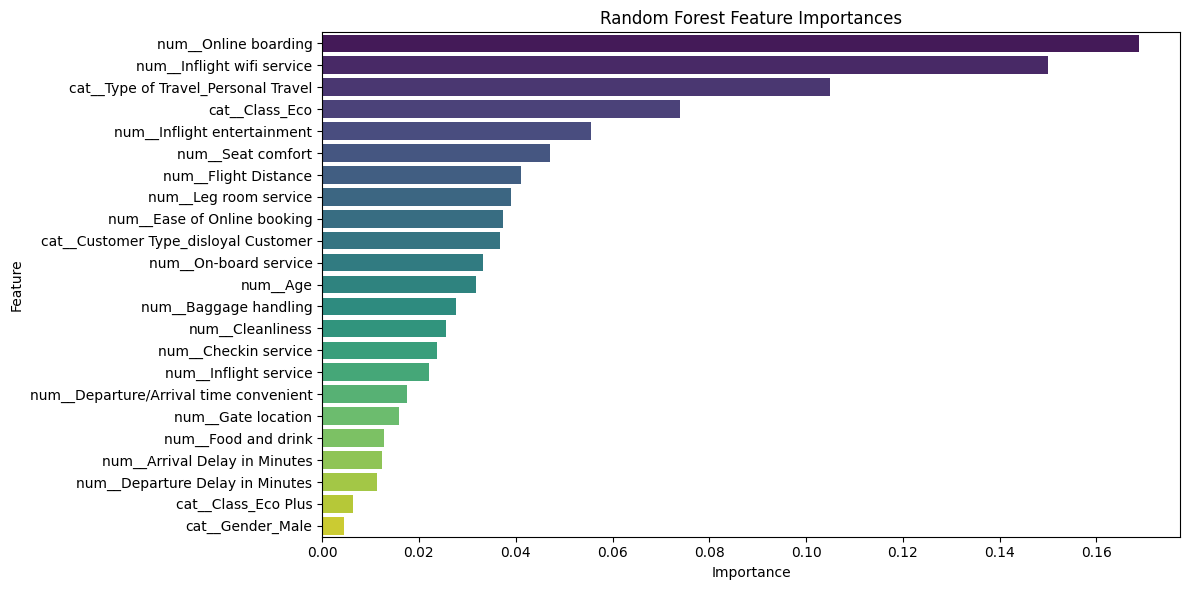

In [14]:
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

# (Optional) Get the new feature names after transformation:
# get_feature_names_out() is available in scikit-learn 1.0+.
feature_names = preprocessor.get_feature_names_out()

# -------- Random Forest Training for Feature Importances --------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_proc, y_train)

# Extract feature importances
importances = rf.feature_importances_

# Create a DataFrame pairing feature names with their importances and sort it
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Display top 10 features
print("Top 10 Feature Importances:")
print(importance_df.head(10))

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

most inportant features are:

Ease of Online Boarding and inflight wifi,


while least important are delays in departure and arrival, 



In [ ]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# For tree-based models (the best group), use TreeExplainer.
for name in best_models:
    if name in saved_pipelines:
        print(f"SHAP Analysis for {name}:")
        pipe = saved_pipelines[name]
        # Transform the test data using the preprocessor.
        X_test_transformed = pipe.named_steps["preprocessor"].transform(X_test)
        
        # Instead of accessing feature names from the pipeline, use the preprocessor directly.
        feature_names = preprocessor.get_feature_names_out()
        
        # Create a SHAP explainer using TreeExplainer.
        explainer = shap.TreeExplainer(pipe.named_steps["classifier"])
        shap_values = explainer.shap_values(X_test_transformed)
        
        # If the model is binary classification, select the SHAP values for the positive class (typically index 1)
        if isinstance(shap_values, list):
            shap_vals = shap_values[1]
        else:
            shap_vals = shap_values
        
        shap.summary_plot(shap_vals, X_test_transformed, feature_names=feature_names)
        plt.title(f"SHAP Summary for {name}")
        plt.tight_layout()
        plt.show()


In [ ]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# For KernelExplainer, it's advisable to use a subset of your training and test data.
X_background = X_train.sample(n=50, random_state=42)

for name in worst_models:
    if name in saved_pipelines:
        print(f"SHAP Analysis for {name}:")
        pipe = saved_pipelines[name]
        # For efficiency, sample a subset of X_test.
        X_test_sample = X_test.sample(n=50, random_state=42)
        X_test_transformed = pipe.named_steps["preprocessor"].transform(X_test_sample)
        
        # Use KernelExplainer with the pipeline's predict function, and the background sample.
        explainer = shap.KernelExplainer(pipe.predict, pipe.named_steps["preprocessor"].transform(X_background))
        shap_values = explainer.shap_values(X_test_transformed, nsamples=100)
        
        if isinstance(shap_values, list):
            shap_vals = shap_values[1]
        else:
            shap_vals = shap_values
        
        feature_names = preprocessor.get_feature_names_out()
        shap.summary_plot(shap_vals, X_test_transformed, feature_names=feature_names)
        plt.title(f"SHAP Summary for {name}")
        plt.tight_layout()
        plt.show()
